<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture06/notebook/reg_with_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Exercise: Regularization with Cross-validation

## Description :
The aim of this exercise is to understand regularization with cross-validation.

<img src="https://github.com/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture06/fig/fig1.png?raw=1" style="width: 500px;">

## Data Description:

## Instructions:

- Initialising the required parameters for this exercise. This can be viewed in the scaffold.
- Read the data file `polynomial50.csv` and assign the predictor and response variables.
- Use the helper code to visualise the data.
- Define a function `reg_with_validation` that performs Ridge regularization by taking a random_state parameter.
    - Split the data into train and validation sets by specifying the random_state.
    - Compute the polynomial features for the train and validation sets.
    - Run a loop for the alpha values. Within the loop:
        - Initialise the Ridge regression model with the specified alpha.
        - Fit the model on the training data and predict and on the train and validation set.
        - Compute the MSE of the train and validation prediction.
        - Store these values in lists.
- Run reg_with_validation for varying random states and plot a graph that depicts the best alpha value and the best MSE. The graph will be similar to the one given above.
- Define a function reg_with_cross_validation that performs Ridge regularization with cross-validation by taking a random_state parameter.
    - Sample the data using the specified random state.
    - Assign the predictor and response variables using the sampled data.
    - Run a loop for the alpha values. Within the loop:
        - Initialise the Ridge regression model with the specified alpha.
        - Fit the model on the entire data and using cross-validation with 5 folds.
        - Get the train and validation MSEs by taking their mean.
        - Store these values in lists.
- Run `reg_with_cross_validation` for varying random states and plot a graph that depicts the best alpha value and the best MSE.
- Use the helper code given to print your best MSEs in the case of simple validation and cross-validation for different random states.

## Hints:

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html" target="_blank">df.sample()</a>
Returns a random sample of items from an axis of the object.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html" target="_blank">sklearn.cross_validate()</a>
Evaluate metric(by `cross-validation` and also record fit/score times.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_blank">np.mean()</a>
Compute the arithmetic mean along the specified axis.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.RidgeRegression()</a>
Linear least squares with l2 regularization.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.fit" target="_blank">sklearn.fit()</a>
Fit Ridge egression model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a>
Mean squared error regression loss.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generate polynomial and interaction features.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform" target="_blank">sklearn.fit_transform()</a>
Fit to data, then transform it.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [2]:
# Initialising required parameters

# The list of random states
ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]

# The list of alpha for regularization
alphas = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]

# The degree of the polynomial
degree= 30


In [5]:
# Read the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lovecrushfamily/2021-CS109A/refs/heads/master/content/lectures/lecture06/data/polynomial50.csv')

# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f
f = df['f'].values


<ipython-input-6-0a555f275755>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x,f, 'k-', label = 'True function',linewidth=4,color ='#9FC131FF')


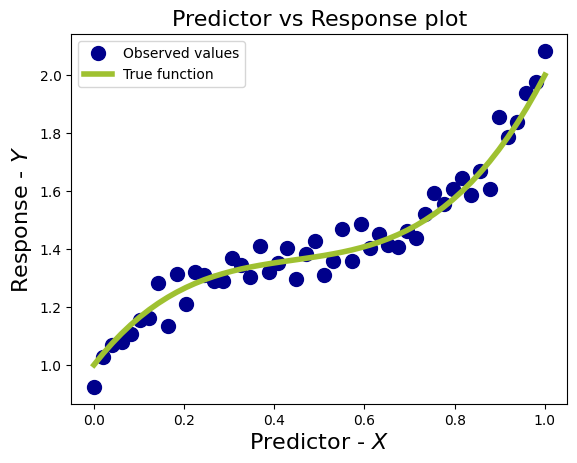

In [6]:
# Helper code below to visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x,y, 'o', label = 'Observed values',markersize=10 ,color = 'Darkblue')

# Plot x vs true function value
ax.plot(x,f, 'k-', label = 'True function',linewidth=4,color ='#9FC131FF')

ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16)
plt.show();


In [7]:
# Function to perform regularization with simple validation
def reg_with_validation(rs):

    # Split the data into train and validation sets with train size
    # as 80% and random_state as the value given as the function parameter
    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8, random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features for the train and validation sets
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_val= PolynomialFeatures(degree).fit_transform(x_val)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the current
        # alpha and with fit_intercept=False
        ridge_reg = Ridge(alpha = alpha, fit_intercept=False)

        # Fit on the modified training data
        ridge_reg.fit(x_poly_train, y_train)

        # Predict on the training set
        y_train_pred = ridge_reg.predict(x_poly_train)

        # Predict on the validation set
        y_val_pred = ridge_reg.predict(x_poly_val)

        # Compute the training and validation mean squared errors
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_val, y_val_pred)

        # Append the MSEs to their respective lists
        training_error.append(mse_train)
        validation_error.append(mse_val)

    # Return the train and validation MSE
    return training_error, validation_error


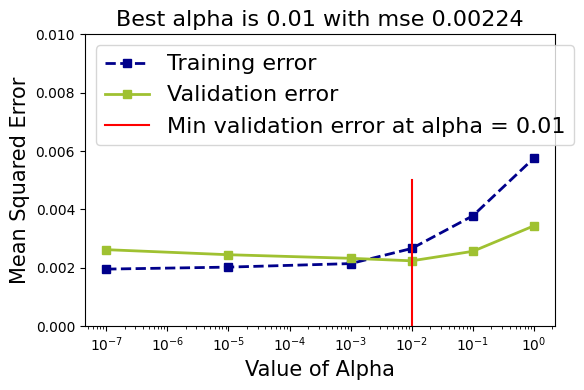

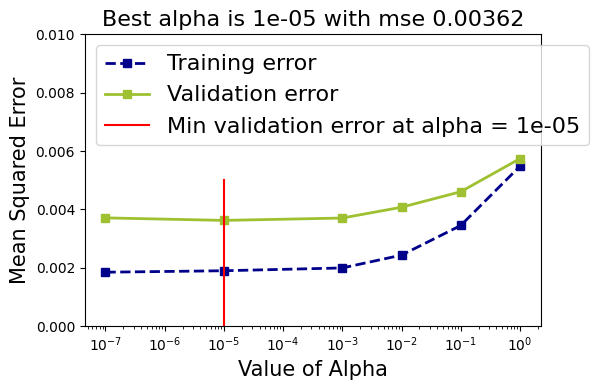

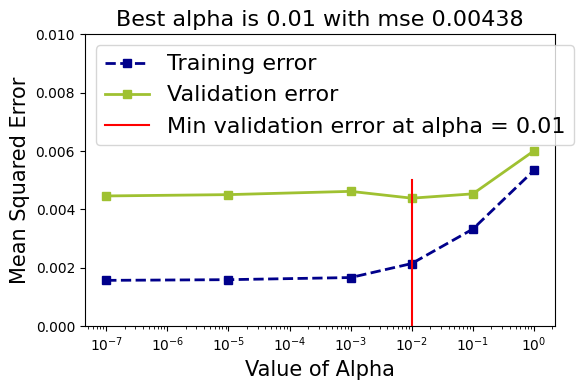

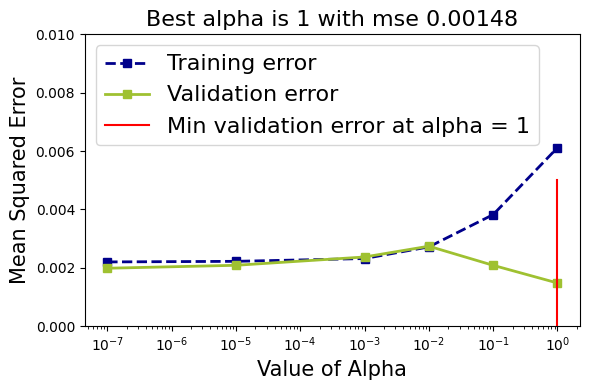

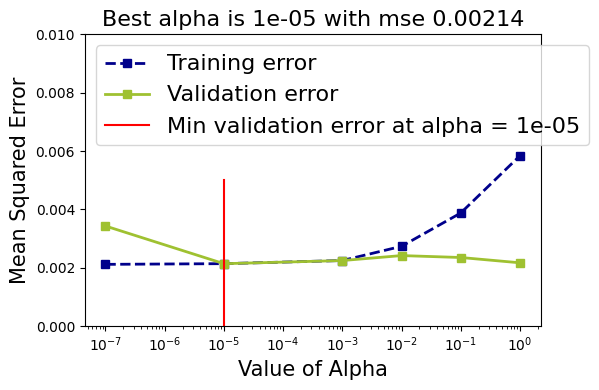

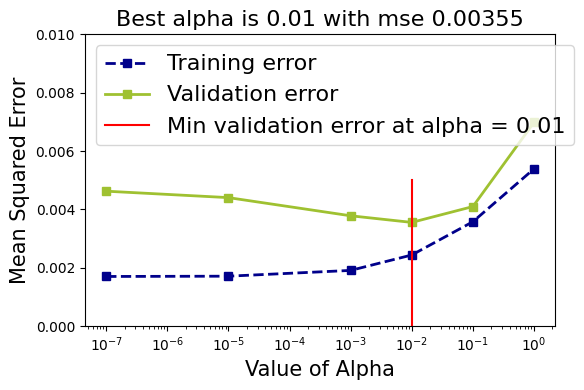

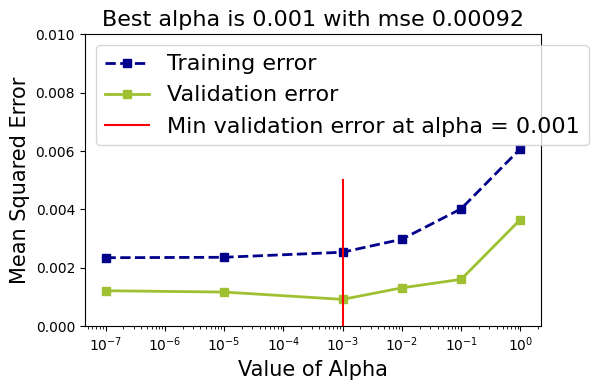

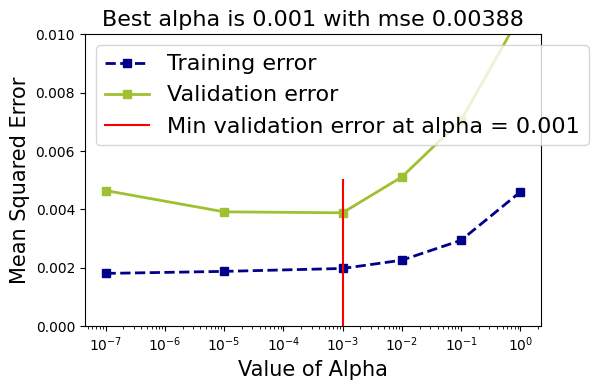

In [8]:
### edTest(test_validation) ###
# Initialise a list to store the best alpha using simple validation for varying random states
best_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):

    # Get the train and validation error by calling the
    # function reg_with_validation
    training_error, validation_error = reg_with_validation(ran_state[i])

    # Get the best mse from the validation_error list
    best_mse  = validation_error[np.argmin(validation_error)]

    # Get the best alpha value based on the best mse
    best_parameter = alphas[np.argmin(validation_error)]


    # Append the best alpha to the list
    best_alpha.append(best_parameter)

    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))

    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'upper left',fontsize=16)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with mse {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()


In [9]:
# Function to perform regularization with cross validation
def reg_with_cross_validation(rs):

    # Sample the data to get different splits using the random state
    df_new = df.sample(frac = 1, random_state = rs)

    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    x = df_new[['x']].values

    # Assign the values of the 'y' column as the response from your sampled dataframe
    y = df_new['y'].values

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features on the entire data
    x_poly = PolynomialFeatures(degree).fit_transform(x)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha value and with fit_intercept=False
        ridge_reg = Ridge(alpha = alpha, fit_intercept=False)

        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Set return_train_score to True
        ridge_cv = cross_validate(ridge_reg, x_poly, y, scoring = 'neg_mean_squared_error', cv = 5, return_train_score = True)

        # Compute the training and validation errors got after cross validation
        mse_train = -np.mean(ridge_cv['train_score'])
        mse_val = -np.mean(ridge_cv['test_score'])

        # Append the MSEs to their respective lists
        training_error.append(mse_train)
        validation_error.append(mse_val)

    # Return the train and validation MSE
    return training_error, validation_error


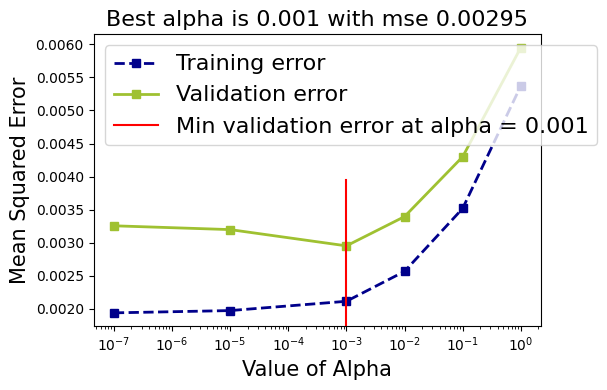

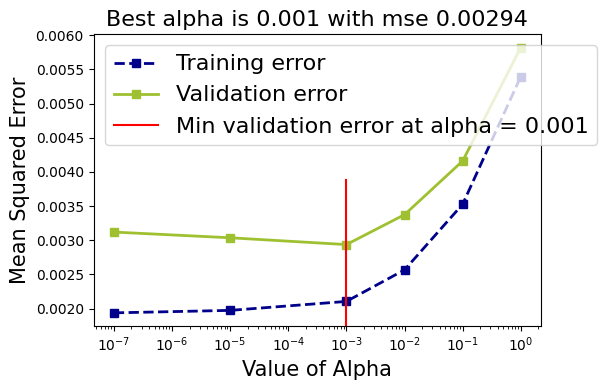

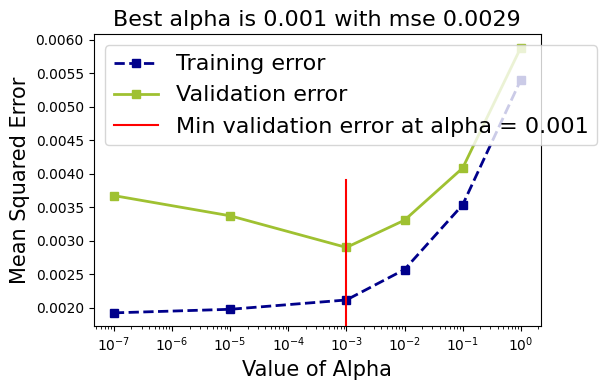

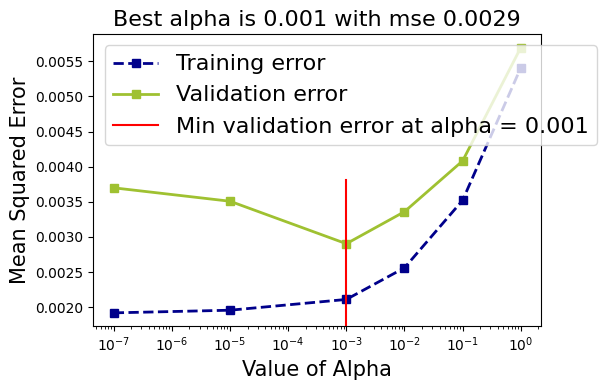

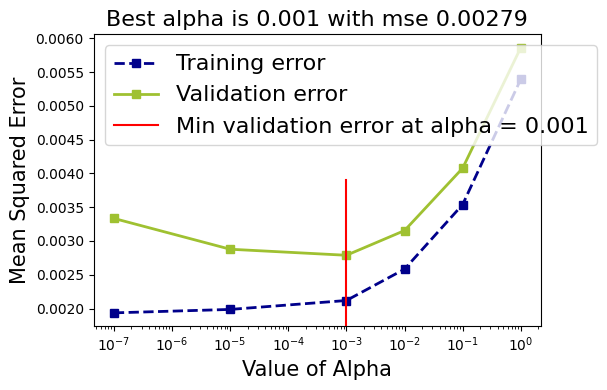

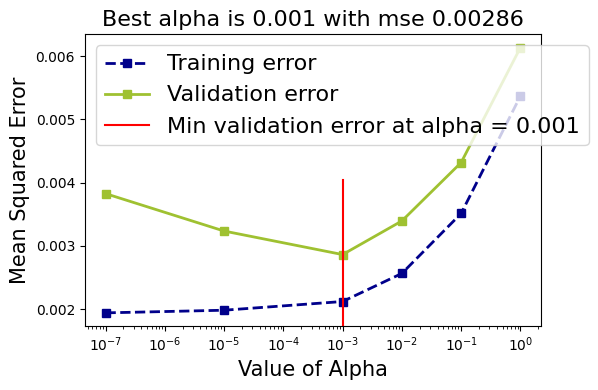

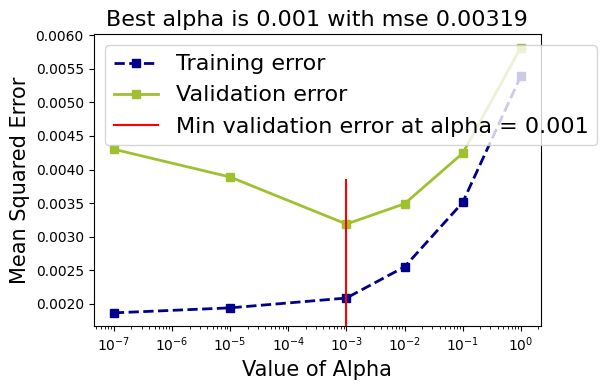

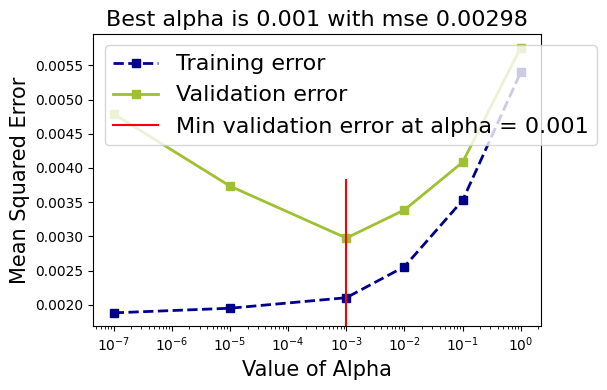

In [10]:
### edTest(test_cross_validation) ###
# Initialise a list to store the best alpha using cross validation for varying random states
best_cv_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):

    # Get the train and validation error by calling the function reg_with_cross_validation
    training_error, validation_error = reg_with_cross_validation(ran_state[i])

    # Get the best mse from the validation_error list
    best_mse  = validation_error[np.argmin(validation_error)]

    # Get the best alpha value based on the best mse
    best_parameter = alphas[np.argmin(validation_error)]

    # Append the best alpha to the list
    best_cv_alpha.append(best_parameter)

    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))

    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'upper left',fontsize=16)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with mse {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()


In [11]:
# Helper code to print your findings
pt = PrettyTable()

pt.field_names = ["Random State", "Best Alpha with Validation", "Best Alpha with Cross-Validation"]

for i in range(6):
    pt.add_row([ran_state[i], best_alpha[i], best_cv_alpha[i]])
print(pt)


+--------------+----------------------------+----------------------------------+
| Random State | Best Alpha with Validation | Best Alpha with Cross-Validation |
+--------------+----------------------------+----------------------------------+
|      0       |            0.01            |              0.001               |
|      10      |           1e-05            |              0.001               |
|      21      |            0.01            |              0.001               |
|      42      |             1              |              0.001               |
|      66      |           1e-05            |              0.001               |
|     109      |            0.01            |              0.001               |
+--------------+----------------------------+----------------------------------+


#### ⏸ Comment on the results of regularization with simple validation and cross-validation after changing the random state and alpha values.

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below
answer1 = ""
